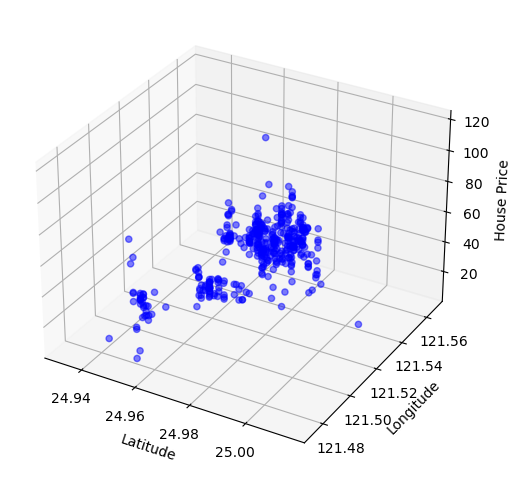

SGD Train error: 94.68921533192903
SGD Test error: 63.799105926400074
SGD Cross validation scores: [ -99.85983353  -76.46524474  -69.20614688  -86.94733025 -157.81177666]
Lat-Long Train error: 116.82781631783199
Lat-Long Test error: 82.08014010114681
Lat-Long Cross validation scores: [ -86.96981935 -113.88005918  -93.62008575 -168.10374845  -93.75602244]
Selected features: Index(['X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude'],
      dtype='object')


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Adathalmaz betöltése
data = pd.read_csv("Real_estate.csv")

# Jellemzők (X1-X6) és célváltozó (Y house price of unit area) kiválasztása
X = data.iloc[:, 1:7]
y = data.iloc[:, 7]

# 3D ábra létrehozása
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Adatpontok ábrázolása
ax.scatter(X["X5 latitude"], X["X6 longitude"], y, c="blue", marker="o", alpha=0.5)

# Tengelyfeliratok hozzáadása
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("House Price")

plt.show()

# Adatok felosztása tanító és tesztelő halmazra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Jellemzők normalizálása
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection használata
k_best = SelectKBest(score_func=f_regression, k=3)
X_train_best = k_best.fit_transform(X_train_scaled, y_train)
X_test_best = k_best.transform(X_test_scaled)

# SGDRegressor modell létrehozása és illesztése
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01, random_state=42)
sgd_regressor.fit(X_train_best, y_train)

# Tanulási és teszt hibák kiszámítása
y_train_pred_sgd = sgd_regressor.predict(X_train_best)
y_test_pred_sgd = sgd_regressor.predict(X_test_best)

train_error_sgd = mean_squared_error(y_train, y_train_pred_sgd)
test_error_sgd = mean_squared_error(y_test, y_test_pred_sgd)

# X5 és X6 oszlopok alapján történő regresszió és hibák kiszámítása
X_lat_long = X.iloc[:, 4:6]

X_train_lat_long, X_test_lat_long, y_train_lat_long, y_test_lat_long = train_test_split(
    X_lat_long, y, test_size=0.2, random_state=42
)

lr_lat_long = LinearRegression()
lr_lat_long.fit(X_train_lat_long, y_train_lat_long)

y_train_pred_lat_long = lr_lat_long.predict(X_train_lat_long)
y_test_pred_lat_long = lr_lat_long.predict(X_test_lat_long)

train_error_lat_long = mean_squared_error(y_train_lat_long, y_train_pred_lat_long)
test_error_lat_long = mean_squared_error(y_test_lat_long, y_test_pred_lat_long)

# Keresztvalidációs pontszámok kiszámítása
cv_scores_sgd = cross_val_score(
    sgd_regressor, X_train_best, y_train, cv=5, scoring="neg_mean_squared_error"
)
cv_scores_lat_long = cross_val_score(
    lr_lat_long, X_lat_long, y, cv=5, scoring="neg_mean_squared_error"
)

# Kiíratjuk az eredményeket
print("SGD Train error:", train_error_sgd)
print("SGD Test error:", test_error_sgd)
print("SGD Cross validation scores:", cv_scores_sgd)

print("Lat-Long Train error:", train_error_lat_long)
print("Lat-Long Test error:", test_error_lat_long)
print("Lat-Long Cross validation scores:", cv_scores_lat_long)

# Kiválasztott jellemzők kiíratása
selected_features = X.columns[k_best.get_support()]
print("Selected features:", selected_features)

Excluded features: ['yr_built', 'condition', 'long', 'date']
Training Error (subset): 52029357459.13185
Testing Error (subset): 58258332797.73972
Training Error (full): 39025554125.54803
Testing Error (full): 44843674887.95824


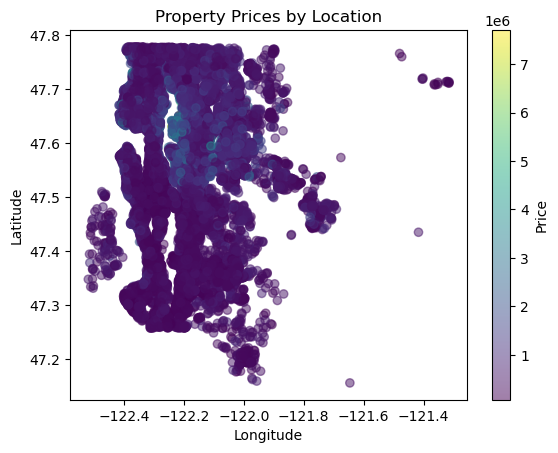

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt

file_path = "house_data.csv"
house_data = pd.read_csv(file_path)

# 4. Preprocess 'date' to a numerical format (year and month)
house_data["date"] = house_data["date"].apply(lambda x: int(x[:6]))

# 4. Encode 'zipcode' as a numeric label if it's categorical
label_encoder = LabelEncoder()
house_data["zipcode"] = label_encoder.fit_transform(house_data["zipcode"])

# 1
X = house_data.drop(["price", "id"], axis=1)
y = house_data["price"]

# 1. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. 4-12(bedrooms through grade)
features_to_scale = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "floors",
    "waterfront",
    "view",
    "condition",
    "grade",
]
scaler = StandardScaler()
X_train_scaled_subset = scaler.fit_transform(X_train[features_to_scale])
X_test_scaled_subset = scaler.transform(X_test[features_to_scale])

# 3. Linear regression and error calculations on the scaled subset
lr_subset = LinearRegression()
lr_subset.fit(X_train_scaled_subset, y_train)
y_train_pred_subset = lr_subset.predict(X_train_scaled_subset)
y_test_pred_subset = lr_subset.predict(X_test_scaled_subset)
train_error_subset = mean_squared_error(y_train, y_train_pred_subset)
test_error_subset = mean_squared_error(y_test, y_test_pred_subset)

# 4. Complete model with date and zipcode encoding, full feature training
scaler_full = StandardScaler()
X_train_scaled = scaler_full.fit_transform(X_train)
X_test_scaled = scaler_full.transform(X_test)
lr_full = LinearRegression()
lr_full.fit(X_train_scaled, y_train)
y_train_pred_full = lr_full.predict(X_train_scaled)
y_test_pred_full = lr_full.predict(X_test_scaled)
train_error_full = mean_squared_error(y_train, y_train_pred_full)
test_error_full = mean_squared_error(y_test, y_test_pred_full)

# 7. Feature selection to exclude the four least important features

selector = SelectKBest(
    score_func=f_regression, k=len(X_train.columns) - 4
)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

scores = selector.scores_
features_sorted_by_score = [
    feature for _, feature in sorted(zip(scores, X_train.columns), reverse=True)
]
least_important_features = features_sorted_by_score[
    -4:
] 

print("Excluded features:", least_important_features)
print("Training Error (subset):", train_error_subset)
print("Testing Error (subset):", test_error_subset)
print("Training Error (full):", train_error_full)
print("Testing Error (full):", test_error_full)

# 5. Visualization of price by location
plt.scatter(
    house_data["long"], house_data["lat"], c=house_data["price"], cmap="viridis", alpha=0.5
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Price")
plt.title("Property Prices by Location")
plt.show()